<h1><b>Import libraries</b></h1>

In [10]:
!pip install opendatasets

In [148]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import warnings
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score, precision_score, recall_score,plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<h1><b>Load dataset</b></h1>

In [12]:
od.download('https://www.kaggle.com/ronitf/heart-disease-uci')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fbiocampiviveiro
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 3.40k/3.40k [00:00<00:00, 1.25MB/s]

In [21]:
df = pd.read_csv('/Fabio/GitHub/Classificação/heart-disease-uci/heart.csv')

<h1><b>Data Analysis</b></h1>

In [75]:
colunas_df = df.columns

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

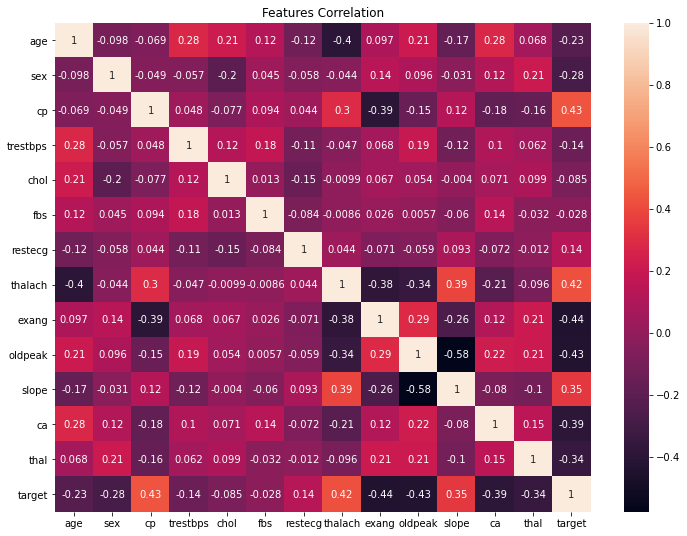

In [41]:
plt.figure(figsize=(12,9))
plt.title('Features Correlation')
sns.heatmap(df.corr(),annot=True);

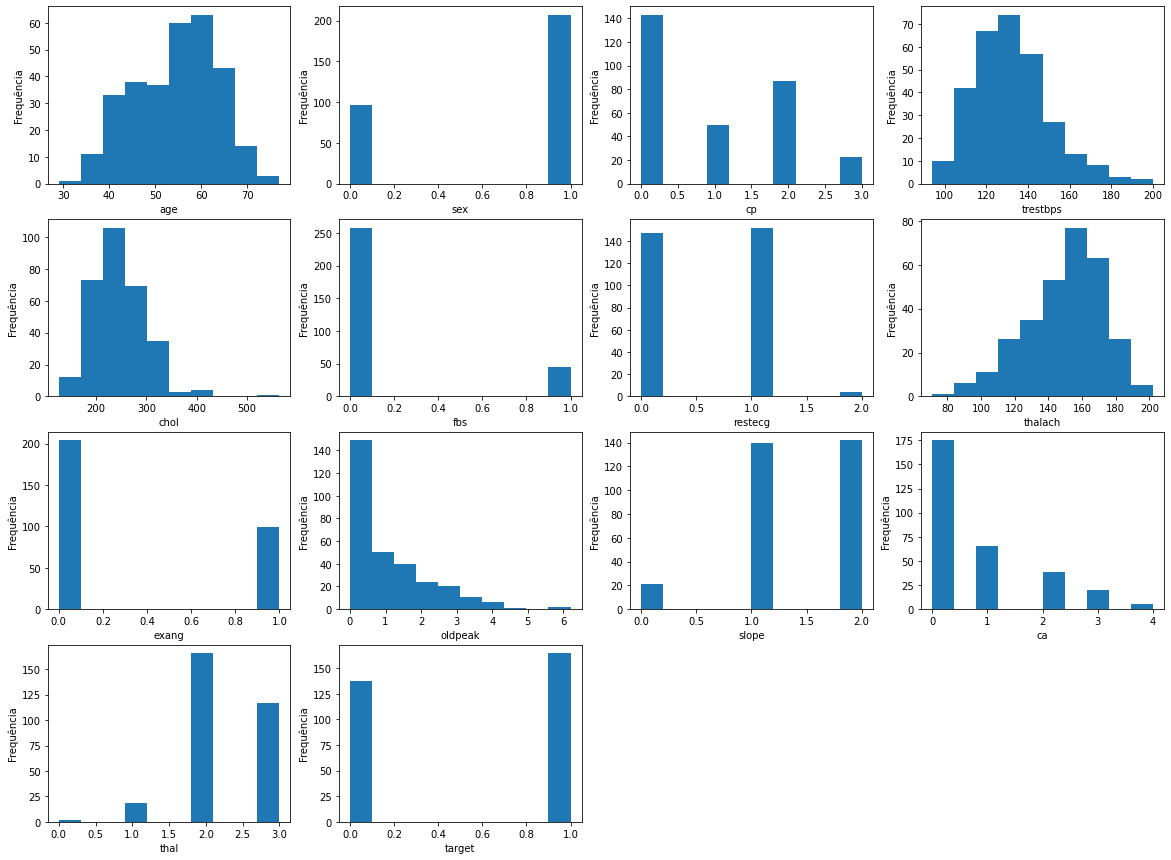

In [60]:
contColNames = list(df.select_dtypes(include='number').columns)
ncols = 4
nrows = int(np.ceil(len(contColNames)/(1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,15))
counter = 0

for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    if counter < len(contColNames):
      ax.hist(df.select_dtypes(include='number')[contColNames[counter]],bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel("Frequência")
          
    else:
      ax.set_axis_off()

    counter += 1
plt.show()

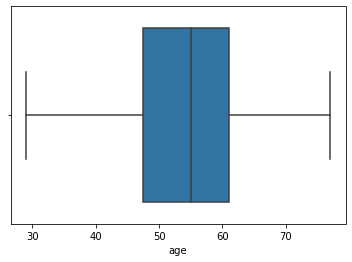

In [64]:
sns.boxplot(df['age']);

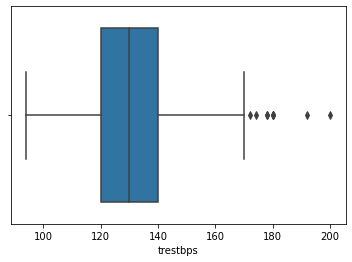

In [65]:
sns.boxplot(df['trestbps']);

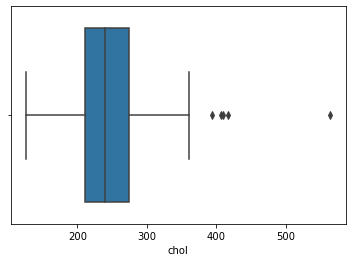

In [66]:
sns.boxplot(df['chol']);

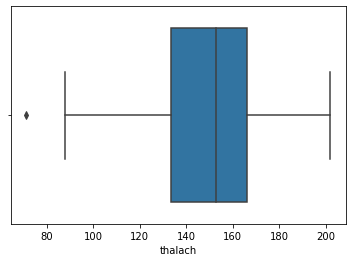

In [67]:
sns.boxplot(df['thalach']);

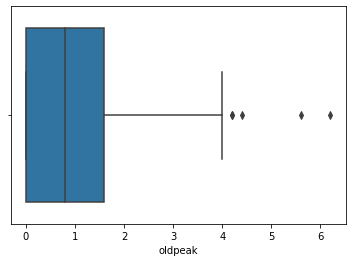

In [68]:
sns.boxplot(df['oldpeak']);

In [138]:
profile = ProfileReport(df, title='Pandas Profiling Report',explorative=True)
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='age', ylabel='count'>

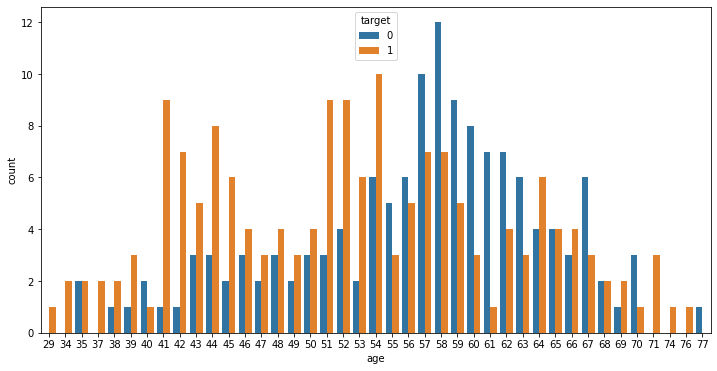

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[0]],hue=df['target'])

<AxesSubplot:xlabel='sex', ylabel='count'>

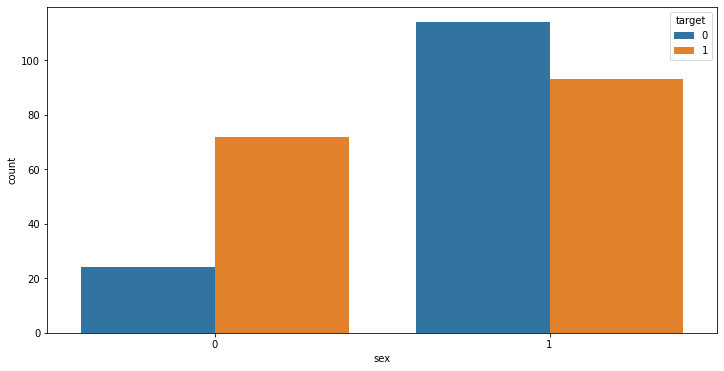

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[1]],hue=df['target'])

<AxesSubplot:xlabel='cp', ylabel='count'>

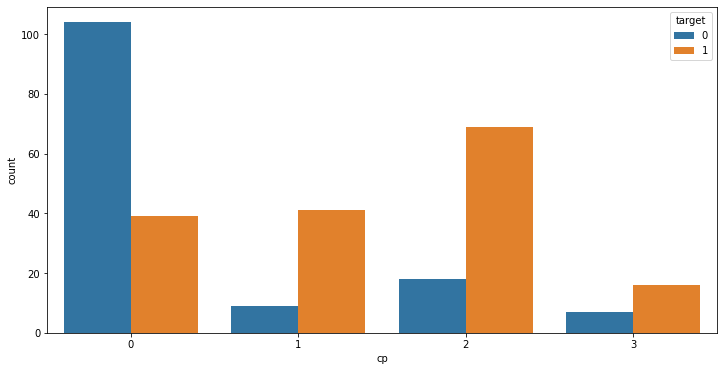

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[2]],hue=df['target'])

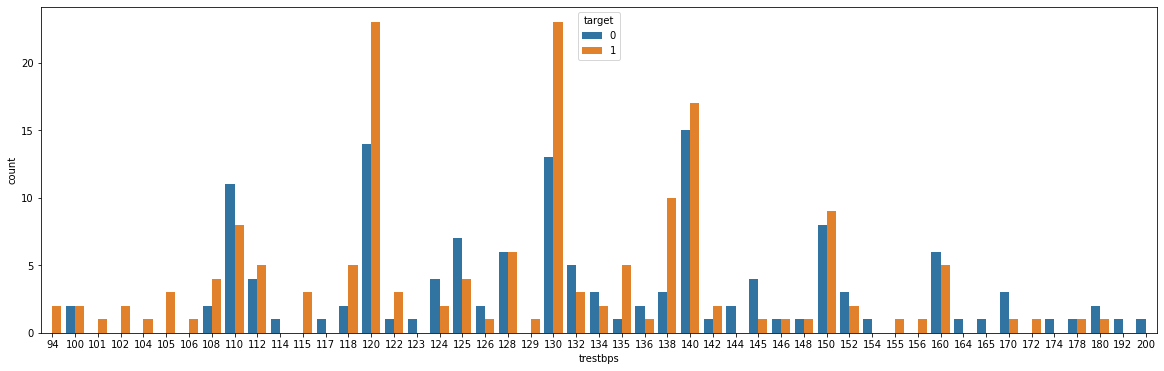

In [98]:
plt.figure(figsize=(20,6))
sns.countplot(df[colunas_df[3]],hue=df['target']);

<AxesSubplot:xlabel='chol', ylabel='count'>

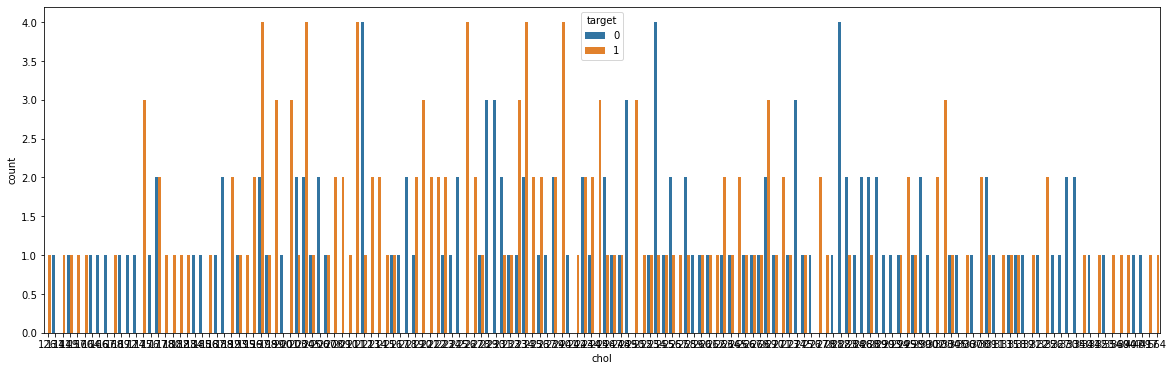

In [97]:
plt.figure(figsize=(20,6))
sns.countplot(df[colunas_df[4]],hue=df['target'])

<AxesSubplot:xlabel='fbs', ylabel='count'>

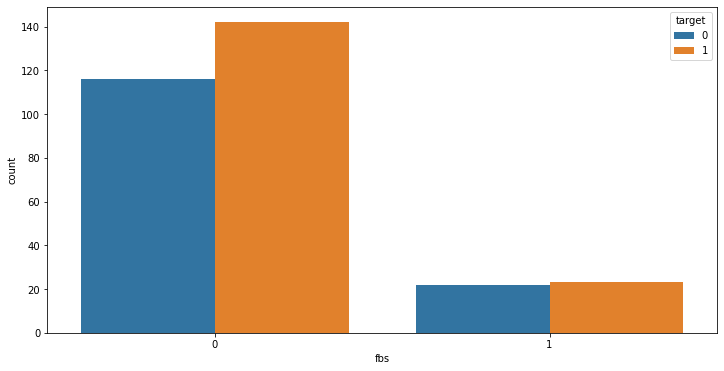

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[5]],hue=df['target'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

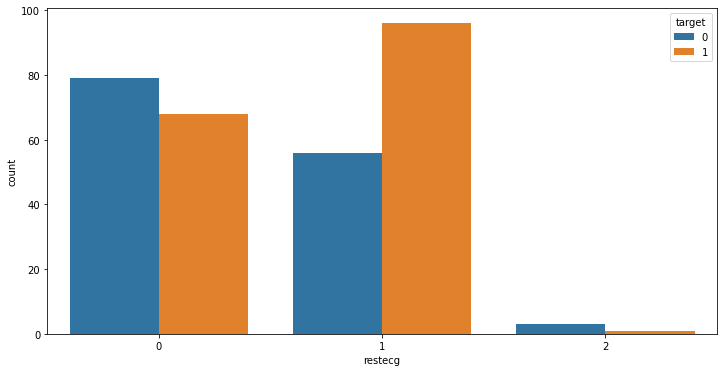

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[6]],hue=df['target'])

<AxesSubplot:xlabel='thalach', ylabel='count'>

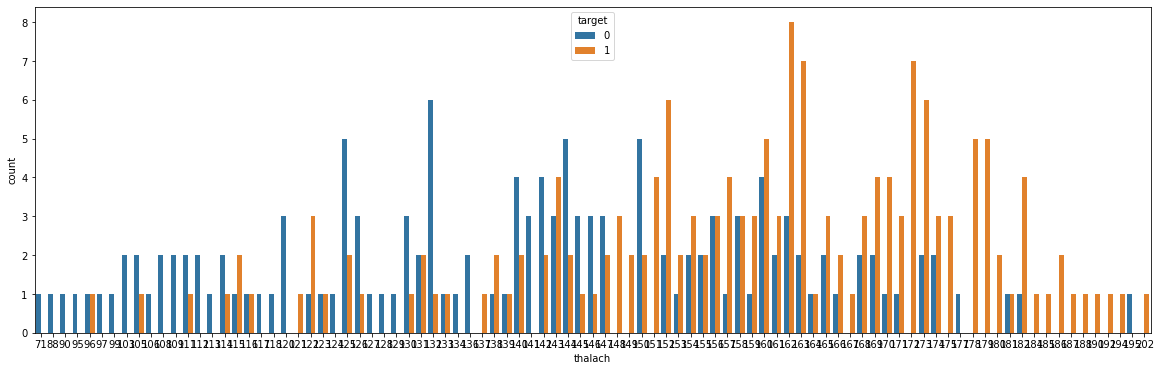

In [96]:
plt.figure(figsize=(20,6))
sns.countplot(df[colunas_df[7]],hue=df['target'])

<AxesSubplot:xlabel='exang', ylabel='count'>

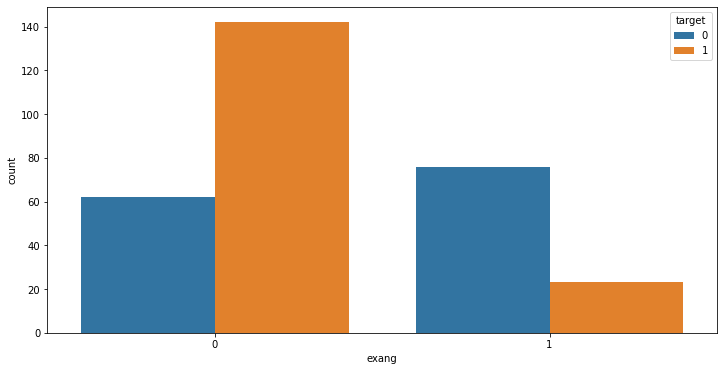

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[8]],hue=df['target'])

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

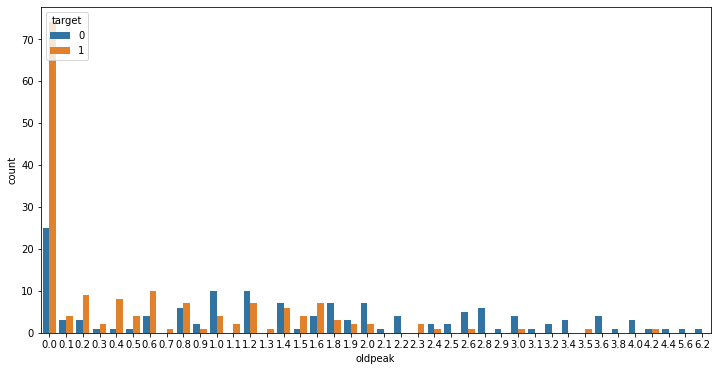

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[9]],hue=df['target'])

<AxesSubplot:xlabel='slope', ylabel='count'>

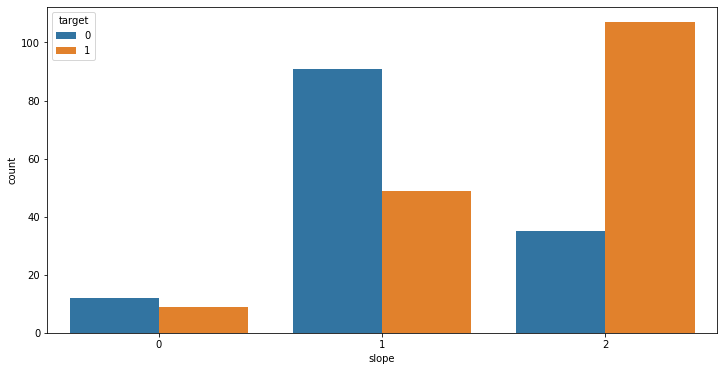

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[10]],hue=df['target'])

<AxesSubplot:xlabel='ca', ylabel='count'>

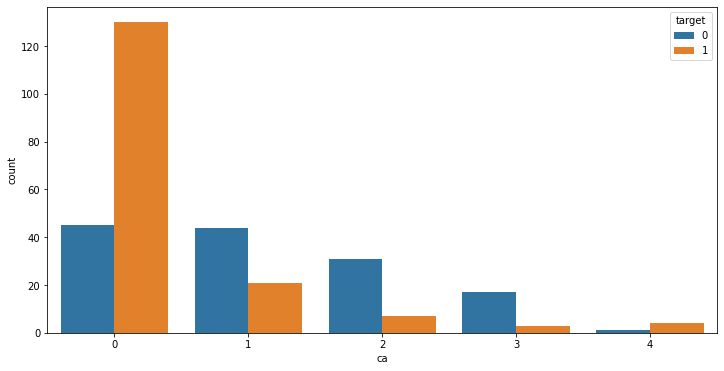

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[11]],hue=df['target'])

<AxesSubplot:xlabel='thal', ylabel='count'>

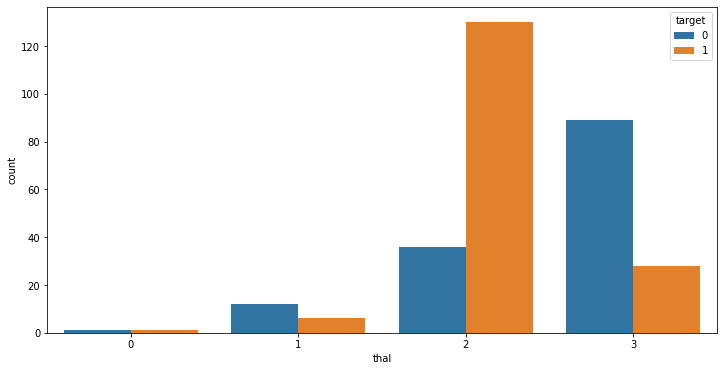

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[12]],hue=df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

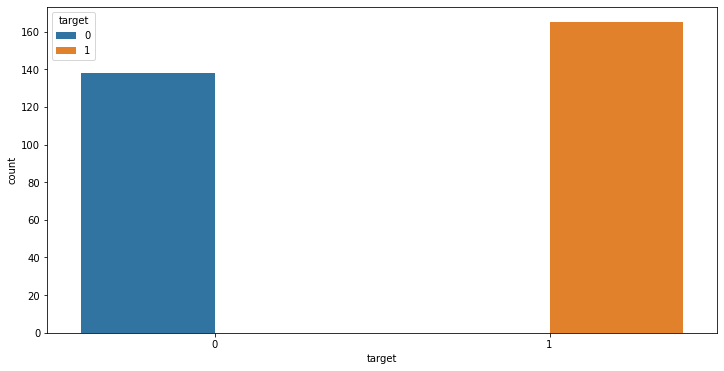

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(df[colunas_df[13]],hue=df['target'])

<h1><b>Dataset split</b></h1>

In [101]:
X = df.drop(columns='target')
y = df['target']

In [107]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X))

In [108]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.20, random_state=42)

In [109]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (242, 2)
Shape y_train: (242,)
Shape X_test: (61, 2)
Shape y_test: (61,)


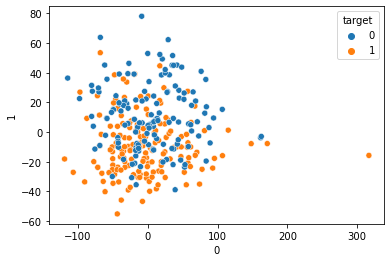

In [145]:
sns.scatterplot(pca_df[0],pca_df[1],hue=y);

<h1><b>Model tests</b></h1>

<h2><b>Linear SVC</b></h2>

In [111]:
clf_svc_linear = SVC(kernel='linear')

In [113]:
clf_svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [114]:
y_pred_svc_linear = clf_svc_linear.predict(X_test)

In [115]:
confusion_matrix(y_pred= y_pred_svc_linear, y_true = y_test)

array([[20,  9],
       [ 6, 26]], dtype=int64)

In [116]:
print(classification_report(y_pred= y_pred_svc_linear, y_true = y_test))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [147]:
f1 = round(f1_score(y_test, y_pred_svc_linear, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred_svc_linear)*100,2)
precision = round(precision_score(y_test, y_pred_svc_linear)*100,2)
recall = round(recall_score(y_test, y_pred_svc_linear)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

F1 Score: 75.17%
Accuracy Score: 75.41%
Precision Score: 74.29%
Recall Score: 81.25%


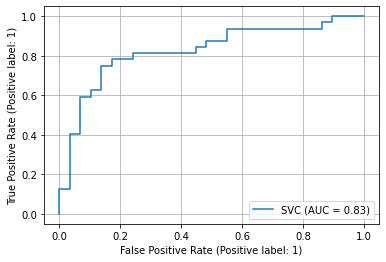

In [149]:
plot_roc_curve(clf_svc_linear, X_test, y_test)  
plt.grid()
plt.show()

<h2><b>Polynomial SVC</b></h2>

In [117]:
clf_svc_poly = SVC(kernel='poly')

In [118]:
clf_svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [119]:
y_pred_svc_poly = clf_svc_poly.predict(X_test)

In [120]:
confusion_matrix(y_pred= y_pred_svc_poly, y_true = y_test)

array([[13, 16],
       [ 1, 31]], dtype=int64)

In [121]:
print(classification_report(y_pred= y_pred_svc_poly, y_true = y_test))

              precision    recall  f1-score   support

           0       0.93      0.45      0.60        29
           1       0.66      0.97      0.78        32

    accuracy                           0.72        61
   macro avg       0.79      0.71      0.69        61
weighted avg       0.79      0.72      0.70        61



In [150]:
f1 = round(f1_score(y_test, y_pred_svc_poly, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred_svc_poly)*100,2)
precision = round(precision_score(y_test, y_pred_svc_poly)*100,2)
recall = round(recall_score(y_test, y_pred_svc_poly)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

F1 Score: 69.47%
Accuracy Score: 72.13%
Precision Score: 65.96%
Recall Score: 96.88%


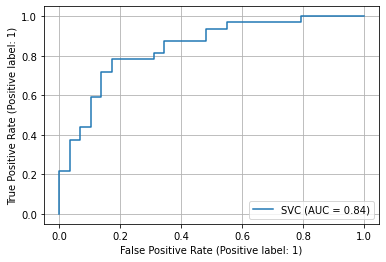

In [151]:
plot_roc_curve(clf_svc_poly, X_test, y_test)  
plt.grid()
plt.show()

<h2><b>Decision Tree</b></h2>

In [128]:
clf_tree = DecisionTreeClassifier(criterion="entropy")
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [129]:
y_pred_tree = clf_tree.predict(X_test)

In [130]:
confusion_matrix(y_pred= y_pred_tree, y_true = y_test)

array([[15, 14],
       [10, 22]], dtype=int64)

In [131]:
print(classification_report(y_pred= y_pred_tree, y_true = y_test))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        29
           1       0.61      0.69      0.65        32

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



In [152]:
f1 = round(f1_score(y_test, y_pred_tree, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred_tree)*100,2)
precision = round(precision_score(y_test, y_pred_tree)*100,2)
recall = round(recall_score(y_test, y_pred_tree)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

F1 Score: 60.13%
Accuracy Score: 60.66%
Precision Score: 61.11%
Recall Score: 68.75%


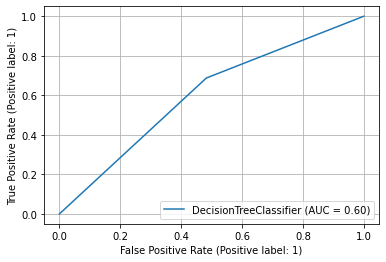

In [153]:
plot_roc_curve(clf_tree, X_test, y_test)  
plt.grid()
plt.show()

<h2><b>MLP</b></h2>

In [134]:
clf_MLP = MLPClassifier()
clf_MLP.fit(X_train,y_train)

MLPClassifier()

In [135]:
y_pred_MLP = clf_MLP.predict(X_test)

In [136]:
confusion_matrix(y_pred= y_pred_MLP, y_true = y_test)

array([[20,  9],
       [ 5, 27]], dtype=int64)

In [137]:
print(classification_report(y_pred= y_pred_MLP, y_true = y_test))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [154]:
f1 = round(f1_score(y_test, y_pred_MLP, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred_MLP)*100,2)
precision = round(precision_score(y_test, y_pred_MLP)*100,2)
recall = round(recall_score(y_test, y_pred_MLP)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

F1 Score: 76.74%
Accuracy Score: 77.05%
Precision Score: 75.0%
Recall Score: 84.38%


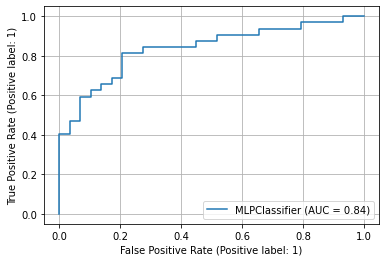

In [155]:
plot_roc_curve(clf_MLP, X_test, y_test)  
plt.grid()
plt.show()